# Astro 9

# Lecture 10: Statistics Continued: Error

In [2]:
#standard preamble
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's generate some data with some attached error

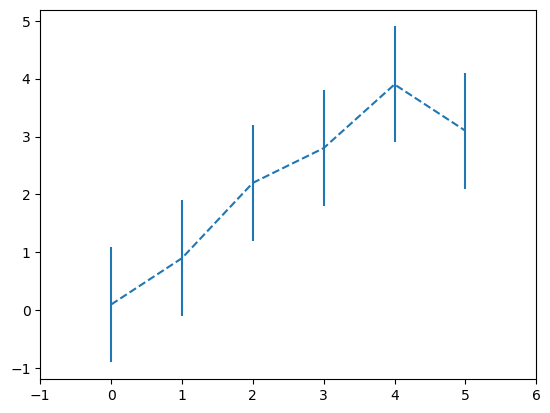

In [2]:
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
a0 = 0
b0 = 1
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,3.1])


# plot it
plt.errorbar(xdata, ydata, xerr=a0, yerr=b0, fmt='--')
plt.xlim(-1,6)
plt.show()

Above we defined error by just one number. Next lets define it by an array

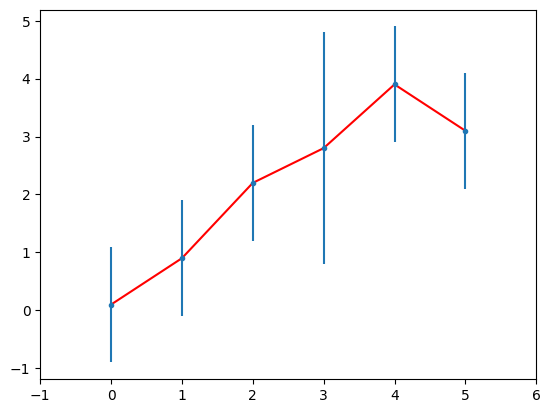

In [3]:
# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,3.1])
sigma = np.array([1.0,1.0,1.0,1.0,1.0,1.0])

# plot it
plt.plot(xdata, ydata, 'r-')
plt.errorbar(xdata, ydata, xerr=0, yerr=sigma, fmt='.')
plt.xlim(-1,6)
plt.show()

But we are still defining have one error for the entire dataset, so the above code doesn't really make much of a difference. Let's try giving each value a different error

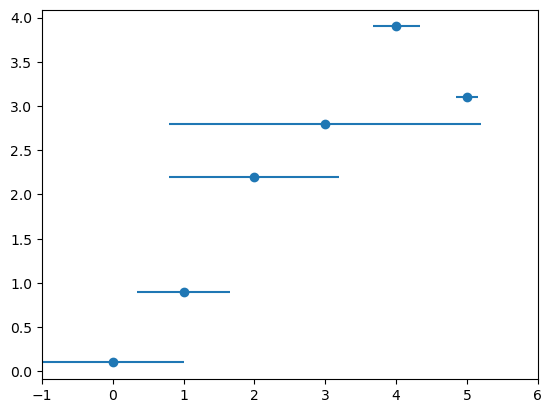

In [4]:
# Generate artificial data
# plus some noise.
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])
ydata = np.array([0.1,0.9,2.2,2.8,3.9,3.1])
sigma = np.array([1.0,.66,1.2,2.2,.333,.15])

# plot it
plt.errorbar(xdata, ydata, xerr=sigma, yerr=0, fmt='o')
plt.xlim(-1,6)
plt.show()

Scatter Plots aren't the only kind of plot we can add error bars to

Text(0.5, 0, 'Energies Measured')

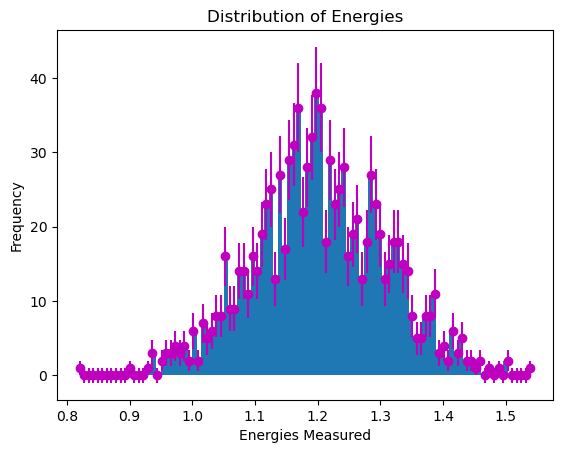

In [5]:
x = np.loadtxt('peak.dat') #load in dat
plt.figure()
n, bins, patches = plt.hist(x, 100) #plot histogram

#find error for the histogram
en = np.zeros(len(n))
for i in range(0,100):
    value = n[i]
    error = np.sqrt(value)
    if value == 0:
        error = 1
    en[i] = error



a = np.linspace(0.820346, 1.53948, 100) #x values for error bars
plt.errorbar(a, n, xerr=0, yerr=en, fmt='mo') #plot error bars
plt.title('Distribution of Energies')
plt.ylabel('Frequency')
plt.xlabel('Energies Measured')

### In Depth Example: Compton Scattering
(Plus a little peak into curve fitting)

Text(0.5, 0, 'Channel Number')

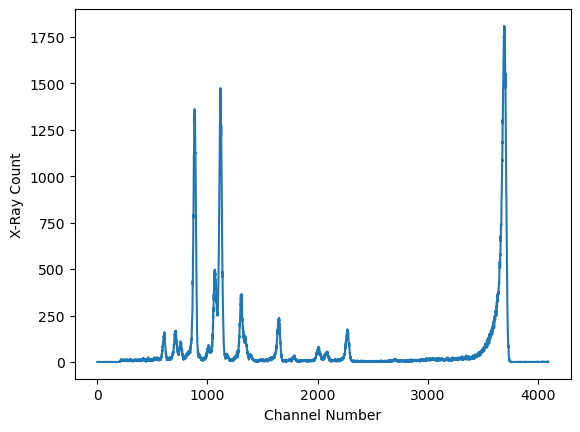

In [8]:
No_Scattering = pd.read_csv('0deg19cmNoColl.csv', header = 5)
Background = pd.read_csv('NoSource1Msec.csv', header = 5)
No_scattering_data = np.array(No_Scattering['Data'])
Background_data = np.array(Background['Data'])

plt.plot(No_Scattering['Channel'], No_scattering_data)
plt.ylabel('X-Ray Count')
plt.xlabel('Channel Number')

In [9]:
for i in range(len(No_scattering_data)):
    No_scattering_data[i] = No_scattering_data[i] - Background_data[i]

4095


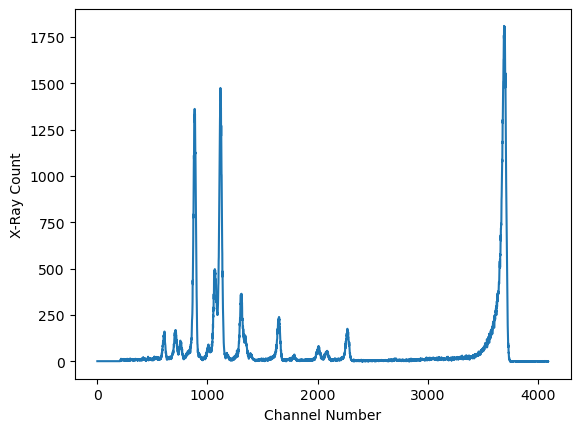

In [10]:
plt.plot(No_Scattering['Channel'], No_scattering_data)
plt.ylabel('X-Ray Count')
plt.xlabel('Channel Number')
plt.savefig('channels.png')
print(np.max(No_Scattering['Channel']))

In [11]:
def centroid(x_1, x_2, c):
    num = []
    for i in range(x_1,x_2):
        n = i * c[i]
        num = np.append(num, n)
    x_c = np.sum(num)/np.sum(c[x_1:x_2])
    return x_c

In [12]:
def centroid_error(x_1, x_2, I, I_err):
    num_1 = []
    num_2 = []
    for i in range(x_1,x_2):
        n_1 = i
        n_2 = i * I[i]
        num_1 = np.append(num_1, n_1)
        num_2 = np.append(num_2, n_2)
    s_1 = (np.sum(num_1)/np.sum(I[x_1:x_2]))*I_err
    s_2 = (np.sum(num_2)/np.sum((I[x_1:x_2]**2)))*I_err
    err = (s_1 - s_2)
    return err

In [13]:
from scipy.optimize import curve_fit
energies = [59.54, 17.3, 13.5, 20.9, 26.3] #keV
energy_channel_1 = centroid(3500, 3800, No_scattering_data)
energy_channel_2 = centroid(1085,1200, No_scattering_data)
energy_channel_3 = centroid(800,950, No_scattering_data)
energy_channel_4 = centroid(1200,1400, No_scattering_data)
energy_channel_5 = centroid(1550,1700, No_scattering_data)
channels = [energy_channel_1, energy_channel_2, energy_channel_3, energy_channel_4, energy_channel_5]

def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

#use the curve_fit function to perform a linear least squares fit
energy_params = curve_fit(linearFunc, channels, energies)
energy_values = []
for i in range(len(channels)):
    func = energy_params[0][1]*channels[i] + energy_params[0][0]
    energy_values = np.append(energy_values, func)

channel_width = np.max(energy_values)/np.max(No_Scattering['Channel'])

energy_err_1 = centroid_error(3500, 3800, No_scattering_data, np.sqrt((2*0.3550285600292078)**2 + channel_width**2))

energy_err_2 = centroid_error(1085, 1200, No_scattering_data, np.sqrt((2*0.2476943442064261)**2 + channel_width**2))

energy_err_3 = centroid_error(800, 950, No_scattering_data, np.sqrt((2*0.23118138792599652)**2 + channel_width**2))

energy_err_4 = centroid_error(1200, 1400, No_scattering_data, np.sqrt((2*0.27246377862706694)**2 + channel_width**2))

energy_err_5 = centroid_error(1550, 1700, No_scattering_data, np.sqrt((2*0.25595082234663913)**2 + channel_width**2))

In [14]:
energy_params

(array([-0.96482891,  0.01651296]),
 array([[ 3.30310793e-02, -1.43136237e-05],
        [-1.43136237e-05,  8.30125587e-09]]))

0.07924864227335651
Reduced Chi Squared = 0.02641621409111884


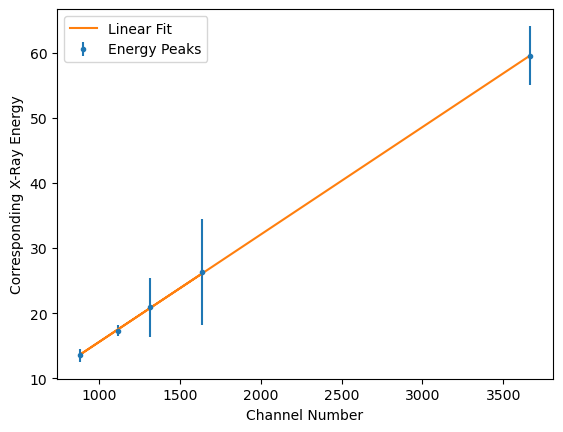

In [15]:
sig = [energy_err_1, energy_err_2, energy_err_3, energy_err_4, energy_err_5]
dof = 5 - 2 #number of data points - fit parameters
chi_2 = []
residuals = []
for i in range(len(energies)):
    chi_square = ((energies[i] - energy_values[i])**2)/(sig[i]**2) 
    residuals.append((energies[i] - energy_values[i]))
    chi_2.append(chi_square)

chi_squared = np.sum(chi_2)
print(chi_squared)
print('Reduced Chi Squared =', chi_squared/(dof))
    
    
#plt.plot(channels, energies, '.')
plt.errorbar(channels, energies, yerr=sig, fmt='.', label = 'Energy Peaks')
plt.plot(channels, energy_values, '-', label = 'Linear Fit')
plt.xlabel('Channel Number')
plt.ylabel('Corresponding X-Ray Energy')
plt.legend()
plt.savefig('channel_fit.png')

8.846257060213247e-14


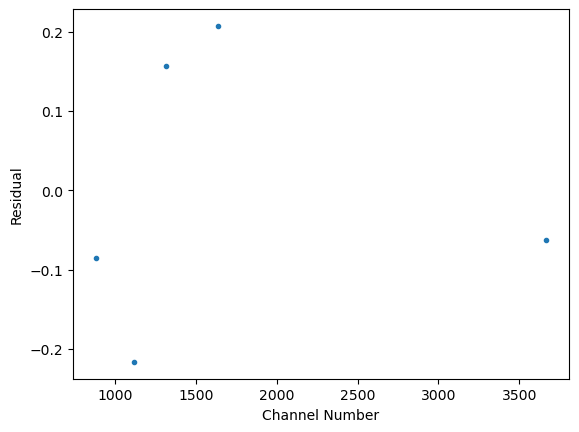

In [16]:
print(np.mean(residuals))
plt.plot(channels, residuals, '.')
plt.xlabel('Channel Number')
plt.ylabel('Residual')
plt.savefig('channel_fit_residuals.png')

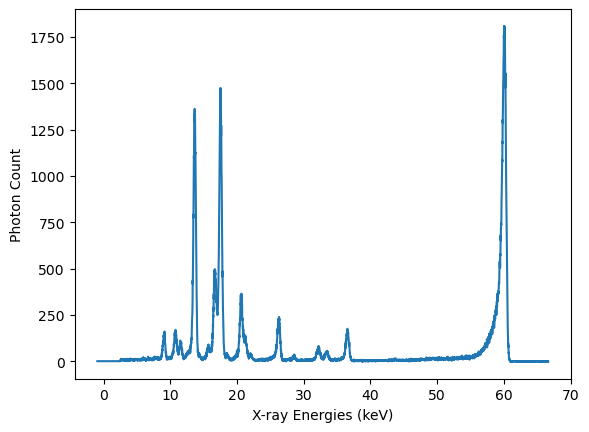

In [17]:
energy_values = []
for i in range(len(No_scattering_data)):
    func = energy_params[0][1]*i + energy_params[0][0]
    energy_values = np.append(energy_values, func)
plt.plot(energy_values, No_scattering_data)
plt.xlabel('X-ray Energies (keV)')
plt.ylabel('Photon Count')
plt.savefig('energies_axis_1.png')